In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Dropout
from keras.regularizers import L2
from keras.callbacks import EarlyStopping


In [3]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [4]:
# Define the target variable
target = 'updrs_1'

In [5]:
# Scale the input features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
train= pd.read_csv('merged_train.csv')

In [7]:
train.head()

,visit_month,patient_id,NPX,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4
0,0,55,11254.3,11254.3,10.0,6.0,15.0,1.861763
1,0,55,732430.0,102060.0,10.0,6.0,15.0,1.861763
2,0,55,732430.0,174185.0,10.0,6.0,15.0,1.861763
3,0,55,732430.0,27278.9,10.0,6.0,15.0,1.861763
4,0,55,732430.0,30838.7,10.0,6.0,15.0,1.861763


In [8]:
train.drop(columns=['patient_id'], inplace = True)

In [9]:
train.head()

,visit_month,NPX,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4
0,0,11254.3,11254.3,10.0,6.0,15.0,1.861763
1,0,732430.0,102060.0,10.0,6.0,15.0,1.861763
2,0,732430.0,174185.0,10.0,6.0,15.0,1.861763
3,0,732430.0,27278.9,10.0,6.0,15.0,1.861763
4,0,732430.0,30838.7,10.0,6.0,15.0,1.861763


In [10]:
train.shape

(941744, 7)

In [11]:
train['updrs_1'].unique()

array([10., 11.,  2.,  1.,  8.,  6.,  9., 12.,  5.,  7.,  4., 17.,  3.,
        0., 14., 16., 15., 20., 18., 13., 33., 28., 25., 26., 19., 21.,
       24., 22., 23., 27.])

In [12]:
train['updrs_1'].nunique()

30

In [13]:
train['updrs_2'].unique()

array([ 6.,  0.,  2., 13.,  1.,  7.,  5., 11.,  8.,  3., 20., 15.,  9.,
       10.,  4., 12., 22., 14., 16., 27., 17., 28., 19., 21., 24., 18.,
       23., 26., 29.])

In [14]:
train['updrs_2'].nunique()

29

In [15]:
train['updrs_3'].unique()

array([15.        , 25.        ,  0.        ,  9.        , 36.        ,
        3.        , 17.        , 38.        , 18.        , 16.        ,
       11.        , 13.        ,  2.        , 21.        ,  5.        ,
       30.        ,  1.        , 14.        , 22.        , 33.        ,
        7.        , 19.        , 28.        , 12.        , 20.        ,
       46.        , 41.        , 29.        , 23.        ,  6.        ,
       10.        , 26.        , 40.        ,  4.        , 39.        ,
        8.        , 24.        , 47.        , 32.        , 31.        ,
       34.        , 27.        , 56.        , 52.        , 35.        ,
       19.42123552, 51.        , 44.        , 68.        , 43.        ,
       67.        , 61.        , 45.        , 59.        , 37.        ,
       48.        , 42.        , 60.        , 55.        , 49.        ,
       63.        , 78.        , 58.        , 50.        , 66.        ])

In [16]:
train['updrs_3'].nunique()

65

In [17]:
train['updrs_4'].unique()

array([ 1.86176284,  5.        ,  4.        ,  0.        ,  2.        ,
        3.        , 10.        ,  6.        ,  9.        ,  1.        ,
        7.        ,  8.        , 11.        , 13.        , 14.        ,
       12.        , 20.        , 16.        ])

In [18]:
train['updrs_4'].nunique()

18

In [19]:
train['visit_month'].unique()

array([  0,   3,   6,  12,  18,  24,  30,  36,  48,  54,  60,  72,  84,
        96, 108], dtype=int64)

In [20]:
train['visit_month'].nunique()

15

In [21]:
train['NPX'].unique()

array([ 11254.3, 732430. ,  39585.8, ..., 369437. , 105830. ,  21257.6])

In [22]:
train['NPX'].nunique()

210353

In [23]:
train['PeptideAbundance'].unique()

array([ 11254.3 , 102060.  , 174185.  , ..., 105830.  ,   5127.26,
        12825.9 ])

In [24]:
train['PeptideAbundance'].nunique()

715930

In [25]:
train.head()

,visit_month,NPX,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4
0,0,11254.3,11254.3,10.0,6.0,15.0,1.861763
1,0,732430.0,102060.0,10.0,6.0,15.0,1.861763
2,0,732430.0,174185.0,10.0,6.0,15.0,1.861763
3,0,732430.0,27278.9,10.0,6.0,15.0,1.861763
4,0,732430.0,30838.7,10.0,6.0,15.0,1.861763


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [27]:
target = 'updrs_3' #['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

In [28]:
train1=train.drop(columns=['updrs_1', 'updrs_2',  'updrs_4'])

In [29]:
train_scaled=scaler.fit_transform(train1.drop(target, axis=1))

In [30]:
train_scaled.shape

(941744, 3)

In [31]:
# Create sequences for the LSTM model
sequence_length = 10
X, y = [], []

for i in range(len(train_scaled) - sequence_length):
    X.append(train_scaled[i:i+sequence_length])
    y.append(train[target].iloc[i+sequence_length])

X, y = np.array(X), np.array(y)


In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Define the LSTM model with L2 regularization and dropout layers
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=L2(0.001), recurrent_regularizer=L2(0.001), bias_regularizer=L2(0.001)))
model.add(Dropout(0.5))  # Add dropout layer with 50% dropout rate
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')


In [34]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the LSTM model with early stopping
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, shuffle=False, callbacks=[early_stopping])


Epoch 1/100
23544/23544 [==============================] - 148s 6ms/step - loss: 12.4656 - val_loss: 12.2980
Epoch 2/100
23544/23544 [==============================] - 148s 6ms/step - loss: 12.3045 - val_loss: 12.2649
Epoch 3/100
23544/23544 [==============================] - 343s 15ms/step - loss: 12.2554 - val_loss: 12.2493
Epoch 4/100
23544/23544 [==============================] - 139s 6ms/step - loss: 12.2208 - val_loss: 12.2276
Epoch 5/100
23544/23544 [==============================] - 10392s 441ms/step - loss: 12.1985 - val_loss: 12.2223
Epoch 6/100
23544/23544 [==============================] - 132s 6ms/step - loss: 12.1903 - val_loss: 12.1977
Epoch 7/100
23544/23544 [==============================] - 136s 6ms/step - loss: 12.1568 - val_loss: 12.1750
Epoch 8/100
23544/23544 [==============================] - 4688s 199ms/step - loss: 12.1517 - val_loss: 12.1806
Epoch 9/100
23544/23544 [==============================] - 152s 6ms/step - loss: 12.1478 - val_loss: 12.1730
Epoch 10/10

In [ ]:
it took 7h

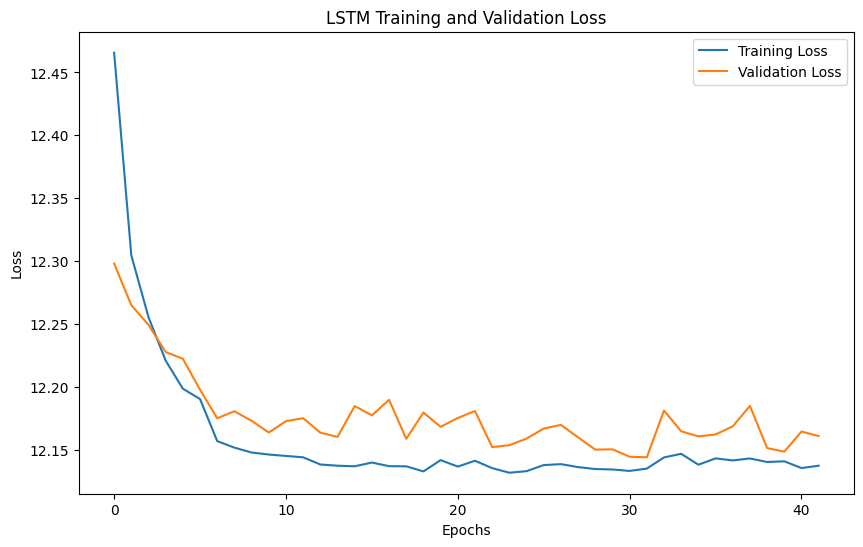

In [35]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
r2 = r2_score(y_test, y_pred)
print('R^2 score:', r2)

5886/5886 [==============================] - 13s 2ms/step
MAE: 12.111405912037926
RMSE: 14.755532585489341
R^2 score: 0.028929540145687604


In [37]:
test=pd.read_csv('merged_test.csv')

In [38]:
test.drop(columns=['patient_id'],inplace =True)

In [39]:
test_scaled=scaler.fit_transform(test)

In [40]:
# Create sequences for the LSTM model
X_test_seq = []

for i in range(len(test_scaled) - sequence_length):
    X_test_seq.append(test_scaled[i:i+sequence_length])

X_test_seq = np.array(X_test_seq)

# Make predictions using the trained LSTM model
test_predictions = model.predict(X_test_seq)

64/64 [==============================] - 0s 2ms/step


In [41]:
print(test_predictions)

[[23.166733]
 [23.166588]
 [23.164843]
 ...
 [16.633175]
 [16.6295  ]
 [16.62912 ]]


(array([  2.,   1.,   1.,  13.,  22., 981.,   9.,   1.,  10.,  13.,   6.,
          8.,   4.,   6.,   2.,   3.,   5.,  13., 423., 524.]),
 array([14.01085949, 14.49211884, 14.97337723, 15.45463657, 15.93589497,
        16.41715431, 16.8984127 , 17.3796711 , 17.8609314 , 18.34218979,
        18.82344818, 19.30470848, 19.78596687, 20.26722527, 20.74848366,
        21.22974396, 21.71100235, 22.19226074, 22.67351913, 23.15477943,
        23.63603783]),
 <BarContainer object of 20 artists>)

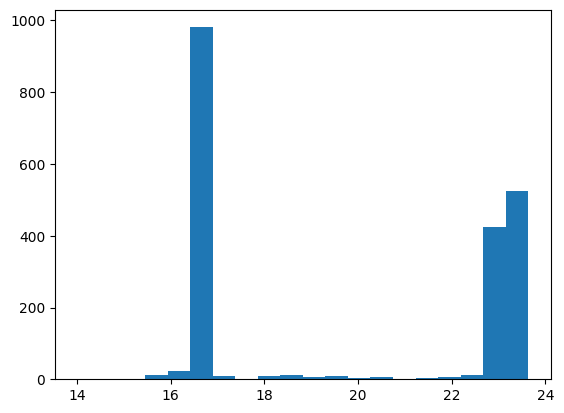

In [42]:
plt.hist(test_predictions,bins= 20)